# Image segmentation 

In [ ]:
using FastAI
using FastAI.Datasets
using CairoMakie
using Metalhead

In [4]:
taskdata = Datasets.loadtaskdata(Datasets.datasetpath("camvid_tiny"), FastAI.ImageSegmentationTask);

In [12]:
method = ImageSegmentation(
    Datasets.getclassessegmentation("camvid_tiny"),
    (96, 128);
    aug_projection=augs_projection());

In [13]:
trainds = methoddataset(taskdata, method, Training())
summary.(getobs(trainds, 1))

("96×128×3 Array{Float32, 3}", "96×128×32 Array{Float32, 3}")

In [14]:
traindl, valdl = methoddataloaders(taskdata, method);

In [157]:
xs, ys = batch = first(traindl)
summary.((xs, ys))

("96×128×3×16 Array{Float32, 4}", "96×128×32×16 Array{Float32, 4}")

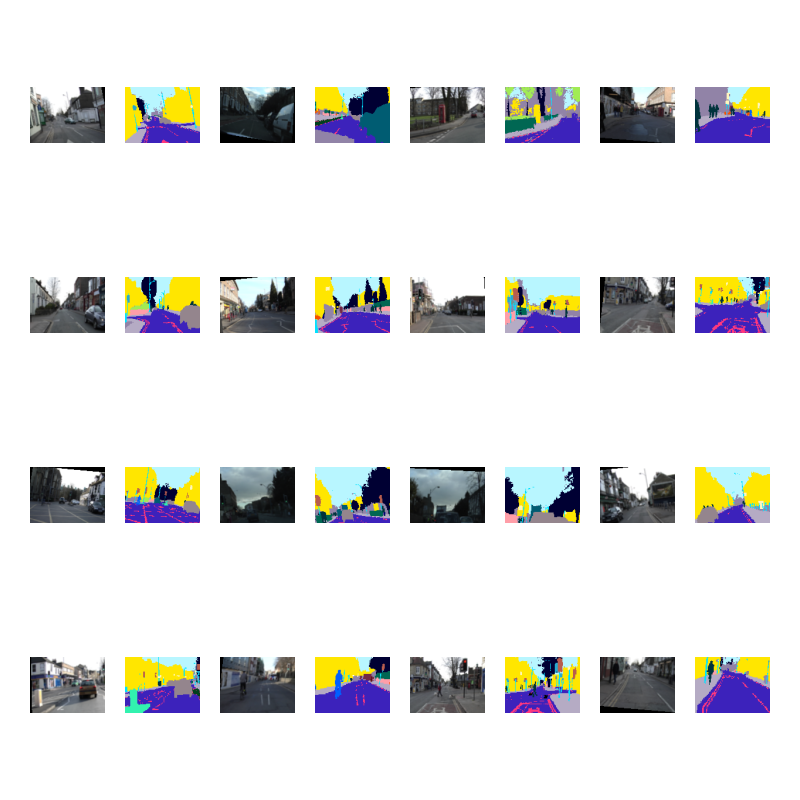

In [16]:
FastAI.plotbatch(method, xs, ys)

##  Creating a loss function

In [232]:
backbone = Metalhead.resnet50(pretrain=true)[1:end-3];

In [246]:
learner = methodlearner(method, taskdata, backbone, ToGPU())

Learner()

In [247]:
fitonecycle!(learner, 50, 0.0033)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬────────┐
│         Phase │ Epoch │   Loss │
├───────────────┼───────┼────────┤
│ TrainingPhase │   1.0 │ 3.7345 │
└───────────────┴───────┴────────┘
┌─────────────────┬───────┬────────┐
│           Phase │ Epoch │   Loss │
├─────────────────┼───────┼────────┤
│ ValidationPhase │   1.0 │ 3.4624 │
└─────────────────┴───────┴────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   2.0 │ 3.53907 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   2.0 │ 3.44943 │
└─────────────────┴───────┴─────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   3.0 │ 3.38727 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   3.0 │ 3.41835 │
└─────────────────┴───────┴─────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   4.0 │ 3.22256 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   4.0 │ 3.31885 │
└─────────────────┴───────┴─────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬────────┐
│         Phase │ Epoch │   Loss │
├───────────────┼───────┼────────┤
│ TrainingPhase │   5.0 │ 2.9798 │
└───────────────┴───────┴────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   5.0 │ 3.04198 │
└─────────────────┴───────┴─────────┘


Epoch 6 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   6.0 │ 2.68241 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   6.0 │ 2.68592 │
└─────────────────┴───────┴─────────┘


Epoch 7 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   7.0 │ 2.32649 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   7.0 │ 2.31139 │
└─────────────────┴───────┴─────────┘


Epoch 8 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   8.0 │ 2.03065 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   8.0 │ 2.08885 │
└─────────────────┴───────┴─────────┘


Epoch 9 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   9.0 │ 1.76198 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   9.0 │ 2.00078 │
└─────────────────┴───────┴─────────┘


Epoch 10 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  10.0 │ 1.60271 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  10.0 │ 1.87013 │
└─────────────────┴───────┴─────────┘


Epoch 11 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  11.0 │ 1.54522 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬────────┐
│           Phase │ Epoch │   Loss │
├─────────────────┼───────┼────────┤
│ ValidationPhase │  11.0 │ 1.5565 │
└─────────────────┴───────┴────────┘


Epoch 12 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  12.0 │ 1.44421 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  12.0 │ 1.73397 │
└─────────────────┴───────┴─────────┘


Epoch 13 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  13.0 │ 1.40197 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬────────┐
│           Phase │ Epoch │   Loss │
├─────────────────┼───────┼────────┤
│ ValidationPhase │  13.0 │ 1.5966 │
└─────────────────┴───────┴────────┘


Epoch 14 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬────────┐
│         Phase │ Epoch │   Loss │
├───────────────┼───────┼────────┤
│ TrainingPhase │  14.0 │ 1.3588 │
└───────────────┴───────┴────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  14.0 │ 1.29937 │
└─────────────────┴───────┴─────────┘


Epoch 15 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  15.0 │ 1.31901 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  15.0 │ 1.39499 │
└─────────────────┴───────┴─────────┘


Epoch 16 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  16.0 │ 1.27464 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  16.0 │ 1.24664 │
└─────────────────┴───────┴─────────┘


Epoch 17 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  17.0 │ 1.26313 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  17.0 │ 1.33678 │
└─────────────────┴───────┴─────────┘


Epoch 18 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  18.0 │ 1.33193 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  18.0 │ 1.48421 │
└─────────────────┴───────┴─────────┘


Epoch 19 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  19.0 │ 1.31976 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  19.0 │ 1.42777 │
└─────────────────┴───────┴─────────┘


Epoch 20 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  20.0 │ 1.28535 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬────────┐
│           Phase │ Epoch │   Loss │
├─────────────────┼───────┼────────┤
│ ValidationPhase │  20.0 │ 1.7369 │
└─────────────────┴───────┴────────┘


Epoch 21 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  21.0 │ 1.28517 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  21.0 │ 1.36839 │
└─────────────────┴───────┴─────────┘


Epoch 22 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  22.0 │ 1.26335 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  22.0 │ 1.37275 │
└─────────────────┴───────┴─────────┘


Epoch 23 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  23.0 │ 1.27131 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  23.0 │ 1.30521 │
└─────────────────┴───────┴─────────┘


Epoch 24 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  24.0 │ 1.17392 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  24.0 │ 1.19275 │
└─────────────────┴───────┴─────────┘


Epoch 25 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  25.0 │ 1.16426 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  25.0 │ 1.26331 │
└─────────────────┴───────┴─────────┘


Epoch 26 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  26.0 │ 1.14385 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  26.0 │ 0.99696 │
└─────────────────┴───────┴─────────┘


Epoch 27 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  27.0 │ 1.14127 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  27.0 │ 1.04517 │
└─────────────────┴───────┴─────────┘


Epoch 28 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬────────┐
│         Phase │ Epoch │   Loss │
├───────────────┼───────┼────────┤
│ TrainingPhase │  28.0 │ 1.1151 │
└───────────────┴───────┴────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  28.0 │ 0.97296 │
└─────────────────┴───────┴─────────┘


Epoch 29 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  29.0 │ 1.09018 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  29.0 │ 1.03809 │
└─────────────────┴───────┴─────────┘


Epoch 30 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  30.0 │ 1.11462 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  30.0 │ 1.03489 │
└─────────────────┴───────┴─────────┘


Epoch 31 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  31.0 │ 1.11227 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  31.0 │ 1.04942 │
└─────────────────┴───────┴─────────┘


Epoch 32 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  32.0 │ 1.09474 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬────────┐
│           Phase │ Epoch │   Loss │
├─────────────────┼───────┼────────┤
│ ValidationPhase │  32.0 │ 1.0373 │
└─────────────────┴───────┴────────┘


Epoch 33 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  33.0 │ 1.08596 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  33.0 │ 0.94502 │
└─────────────────┴───────┴─────────┘


Epoch 34 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬────────┐
│         Phase │ Epoch │   Loss │
├───────────────┼───────┼────────┤
│ TrainingPhase │  34.0 │ 1.0538 │
└───────────────┴───────┴────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  34.0 │ 0.93894 │
└─────────────────┴───────┴─────────┘


Epoch 35 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  35.0 │ 1.03528 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  35.0 │ 0.91586 │
└─────────────────┴───────┴─────────┘


Epoch 36 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  36.0 │ 1.04076 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  36.0 │ 0.90584 │
└─────────────────┴───────┴─────────┘


Epoch 37 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  37.0 │ 1.05771 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  37.0 │ 0.90644 │
└─────────────────┴───────┴─────────┘


Epoch 38 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  38.0 │ 1.04567 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  38.0 │ 0.90048 │
└─────────────────┴───────┴─────────┘


Epoch 39 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  39.0 │ 1.03751 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  39.0 │ 0.89899 │
└─────────────────┴───────┴─────────┘


Epoch 40 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  40.0 │ 1.00836 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  40.0 │ 0.89934 │
└─────────────────┴───────┴─────────┘


Epoch 41 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  41.0 │ 1.02745 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  41.0 │ 0.91372 │
└─────────────────┴───────┴─────────┘


Epoch 42 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  42.0 │ 0.99021 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  42.0 │ 0.90993 │
└─────────────────┴───────┴─────────┘


Epoch 43 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  43.0 │ 0.96343 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  43.0 │ 0.89732 │
└─────────────────┴───────┴─────────┘


Epoch 44 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  44.0 │ 1.00063 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  44.0 │ 0.88087 │
└─────────────────┴───────┴─────────┘


Epoch 45 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  45.0 │ 0.96943 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  45.0 │ 0.87869 │
└─────────────────┴───────┴─────────┘


Epoch 46 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  46.0 │ 0.96275 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  46.0 │ 0.88055 │
└─────────────────┴───────┴─────────┘


Epoch 47 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  47.0 │ 0.96146 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  47.0 │ 0.88173 │
└─────────────────┴───────┴─────────┘


Epoch 48 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  48.0 │ 1.00187 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  48.0 │ 0.88308 │
└─────────────────┴───────┴─────────┘


Epoch 49 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  49.0 │ 0.99524 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  49.0 │ 0.88266 │
└─────────────────┴───────┴─────────┘


Epoch 50 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:01


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  50.0 │ 0.96959 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  50.0 │ 0.88229 │
└─────────────────┴───────┴─────────┘


Learner()

In [248]:
ypreds = learner.model(gpu(xs));

In [249]:
learner.lossfn(ypreds, gpu(ys))

115.27474f0

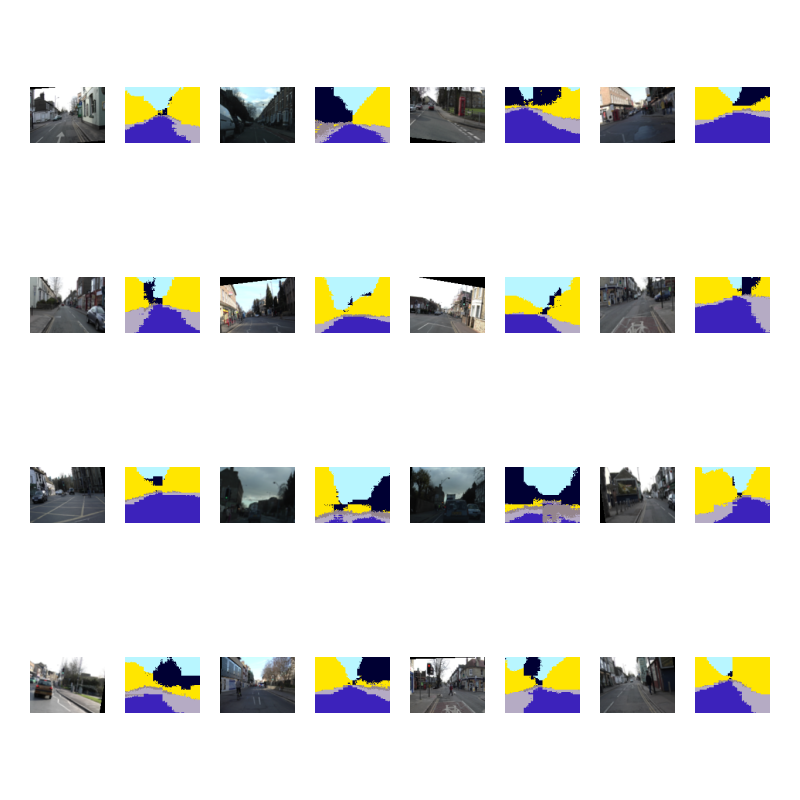

In [250]:
FastAI.plotbatch(method, cpu(xs), cpu(ypreds))